In [3]:
#모듈 설치 및 호환성문제 해결
#!pip install diffusers
#!pip install transformers accelerate safetensors invisible_watermark
#!pip install --upgrade diffusers
#!pip uninstall bitsandbytes
#!pip install bitsandbytes
#!pip uninstall opencv-python-headless opencv-python
#!pip install opencv-python-headless
#!pip install peft
#!pip install -U peft transformers huggingface_hub
#!pip install --upgrade diffusers transformers peft huggingface_hub


# CUDA 경로 설정
#export LD_LIBRARY_PATH=$LD_LIBRARY_PATH:/usr/local/cuda/lib64
#export PATH=$PATH:/usr/local/cuda/bin

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.3/401.3 kB 13.5 MB/s eta 0:00:00
DEPRECATION: devscripts 2.22.1ubuntu1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of devscripts or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip


In [9]:
import os
import torch
from diffusers import StableDiffusionXLPipeline, DiffusionPipeline
from diffusers.utils import load_image, make_image_grid
from safetensors.torch import load_file
from PIL import Image

In [10]:
# 경로 설정
SD_MODEL = "SULGI_Ver_1.2-000010.safetensors"
root = "/home/work/safetensors"
base_ckpt_path = os.path.join(root, "cartoonxl_v10.safetensors")
lora_safetensors_path = os.path.join(root, SD_MODEL)

# 기본 모델 로드
pipe = StableDiffusionXLPipeline.from_single_file(base_ckpt_path, torch_dtype=torch.float16).to('cuda')

# LoRA 가중치 로드 및 적용
if os.path.exists(lora_safetensors_path):
    lora_state_dict = load_file(lora_safetensors_path, device="cuda")
    pipe.load_lora_weights(lora_state_dict)
else:
    raise FileNotFoundError(f"Lora safetensors file not found at {lora_safetensors_path}")

# 리파이너 모델 로드
refiner = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-refiner-1.0", torch_dtype=torch.float16, use_safetensors=True
).to("cuda")

Some weights of the model checkpoint were not used when initializing CLIPTextModelWithProjection: 
 ['text_model.embeddings.position_ids']


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [48]:
tempimg = load_image("/home/work/workspace/SDXL_Scratch_Repo/Img/Untitled.png")

prompts = "SULGI, crying a starry night, sad, content, forest background"
negative_prompt = "multiple tails, more than one tail, two tails, extra tails, three ears, four ears, extra ears, more than two ears, distorted body, misshapen body, disproportionate body, irregular body, twisted body, warped body, unnatural body"
steps = 34

base_image = pipe(
    prompt = prompts, 
    negative_prompt=negative_prompt, 
    num_inference_steps=steps, 
    guidance_scale=7.2, 
)

  0%|          | 0/33 [00:00<?, ?it/s]

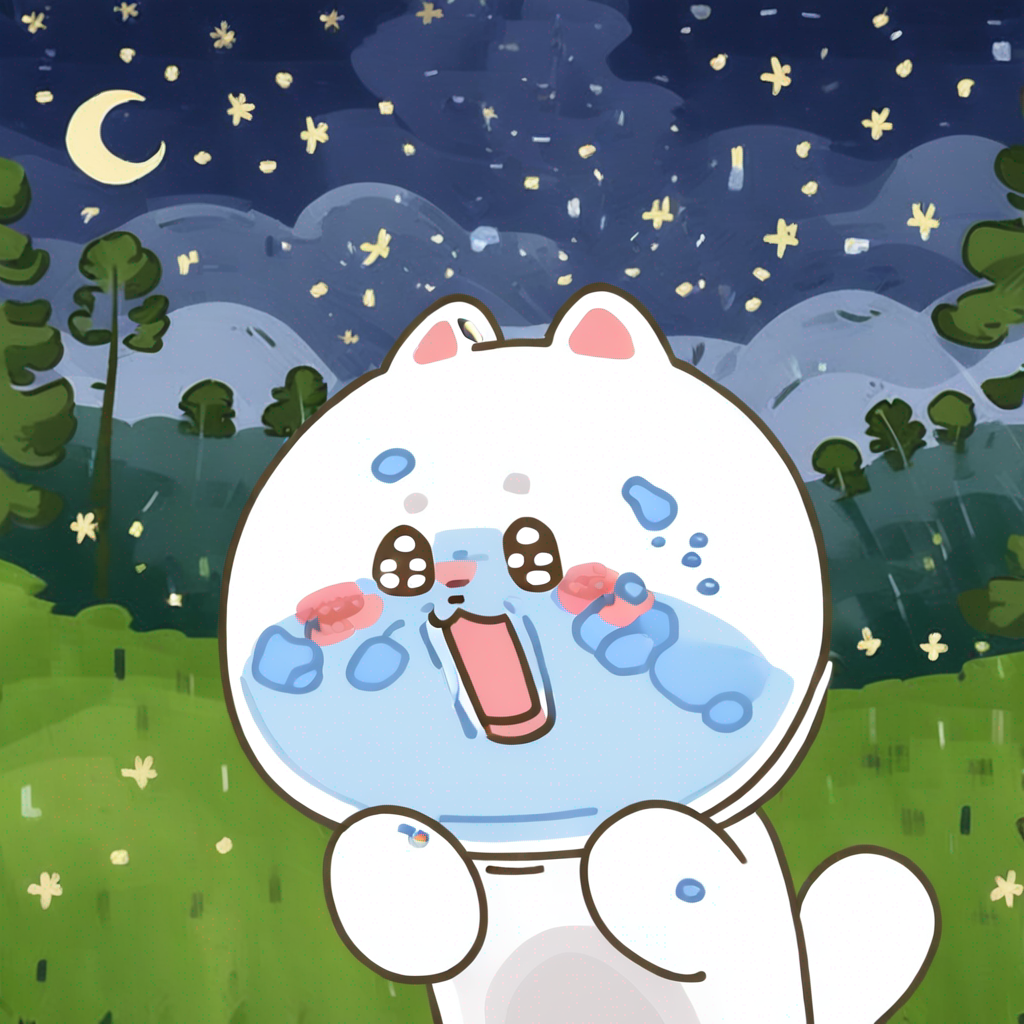

In [49]:
latent_image = base_image.images[0]
latent_image.show()

In [50]:
refine_image = refiner(
        prompt=prompts,
        num_inference_steps=steps,
        denoising_start=0.8,
        image=latent_image
)



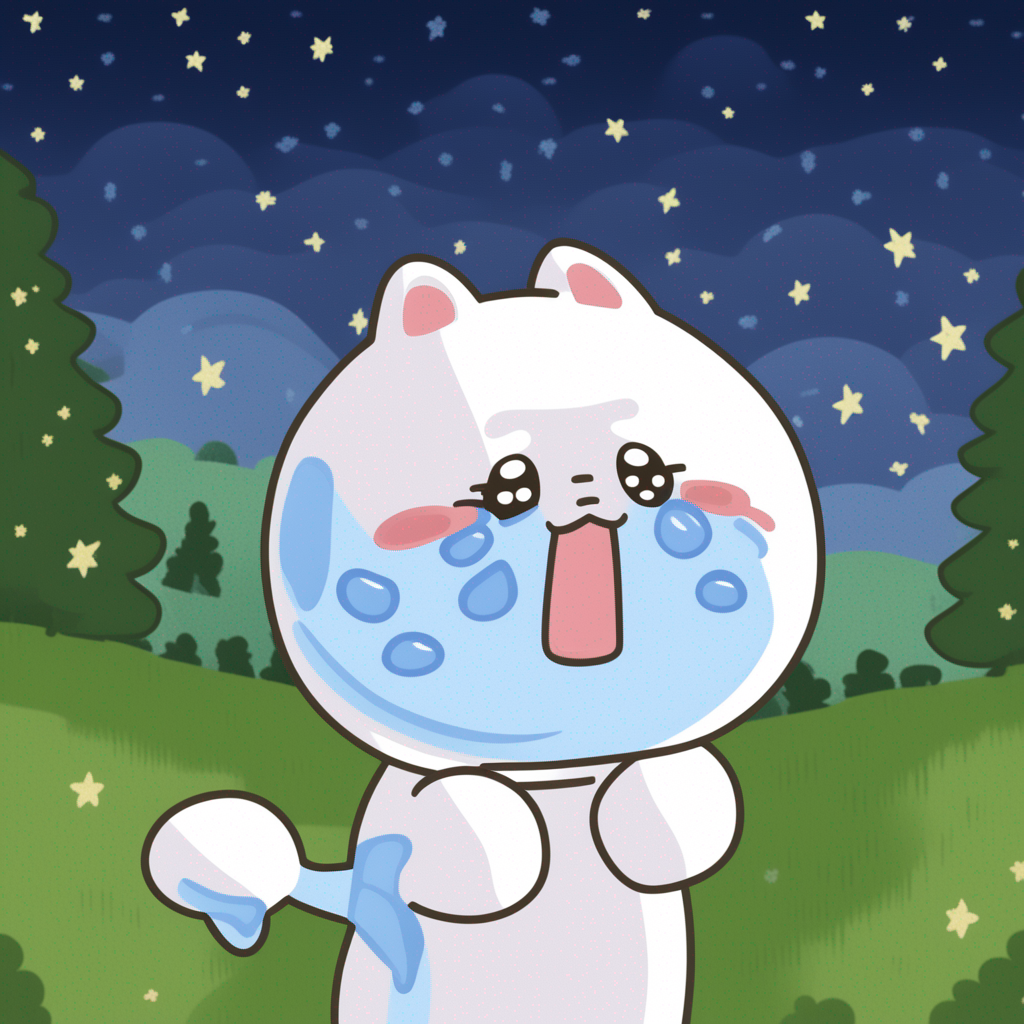

In [ ]:
refine_image.images[0]